# What's the Problem? - An Analysis of New York Housing Complaints

## Introduction

As part of IBM's professional certificate for data science, I was required to complete this capstone project where I had to analyse housing and building complaints in the state of New York. I was given information such as metadata of each complaint made for a house and the details about the buildings.


### Context of the Project

>The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Of those complaints, the Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

>In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

>Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year. 


By analysing existing data from the New York Department of Housing Preservation and Development, I attempted to answer these questions posed by the department:
- What type of complaint should be focused on first?
- Should the department focus on any particular geographical area (borough, zip codes, or street) for the determined complaint type?
- Is there any obvious relationship between the characteristics of a house or building and the complaint type?
- Can a predictive model be created for future possible complaints of the determined complainted type?

## Summary of Results

### Prediction Model Results
For binary target (complaint made or not):

- Logistic regression: Jaccard score of 0.989, F1 score of 0.99

For predicting the number of complaints:

1. K-Nearest Neighbors: accuracy score of 0.97
2. Multiple linear regression: Residual sum of squares of 25923.79, R^2/coeffient of determination of 0.08

### Complaint Type Result
From analysing the data, it was discovered that complaints relating to heating occurred the most with over 2,149,424 complaints compared to the next highest with only 711,141 complaints in comparison. From this, it was determined that heating complaints were going to be focused on to answer the questions that the department provided.

!["Complaint Types"](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/Complaint%20Types.png)

### Geographical Results
Regarding the locations where these complaints occurred, the Bronx had the most amount of complaints with Brooklyn having the second most followed by Manhatten, Queens, and then Staten Island. 

!["Geographical"](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/Boroughs%20Graph.png)

The 5 zip codes with the highest complaint numbers were: 

1. 11226: 69041 complaints
2. 10467: 66073 complaints
3. 10458: 65372 complaints
4. 10468: 58190 complaints
5. 10453: 57818 complaints

and the 5 streets with the most complaints were:

1. GRAND CONCOURSE: 37863 complaints
2. BROADWAY: 24484 complaints
3. OCEAN AVENUE: 18716 complaints
4. MORRIS AVENUE: 16409 complaints
5. ARDEN STREET: 15963 complaints

Based on the number of heating complaints for each borough, I would suggest the Department to focus on **The Bronx**.
Looking at the number of complaints per zip code, the zip codes with the most complaints are **11226** located in Brooklyn, and 10467 located in the Bronx.
Lastly, going off the streets with the most amount of complaints, the **Grand Concourse** has the highest amount of complaints with Broadway second.

### Analysis of Correlations Between Building Characteristics and Complaints
As the Bronx has the highest number of heating complaints out of all the boroughs I focussed on the information for houses and buildings that are located in the Bronx. The data about the building characteristics contained information such as lot numbers, building area, number of floors, and the year the buildings were built. From the information provided, I decided to use two approaches to find a relationship between characteristics and complaints:

1. Use a binary approach where the features will either end in a complaint being made (represented by a 1) or not (represented by a 0)
2. Using total number of complaints for each street to analyse correlation

To find out if there is any correlation, I calculated the Pearson correlation and p-values for the features of the buildings and the target. Lastly, I created a correlation matrix to help visualise the Pearson correlations.

#### Approach 1:
From the correlation data frame, and the correlation matrix, we see that the feature with the highest correlation to a heating complaint being made is the year that the building was built (Pearson=-0.7553). The next highest is the number of floors the house has (Pearson=-0.7313). I believe that the results of the p-values are inconclusive as they are all zero or extremely close to zero. From this, we may infer that this binary approach may not be the method for answering our questions.


|              | Lot Number  | Lot Area    | Building Area | Residential Area | Office Area | Retail Area | Num of Buildings | Num of Floors | Lot Depth    | Building Depth | Year Built | Year 1st Altered | Floor Area Ratio | Max Residential FAR | Max Commercial FAR | Max Facility FAR |
|--------------|-------------|-------------|---------------|------------------|-------------|-------------|------------------|---------------|--------------|----------------|------------|------------------|------------------|---------------------|--------------------|------------------|
| Pearson Corr | 0.0135295   | 0.0113194   | -0.079132     | -0.0981778       | 0.00396574  | -0.0695622  | -0.253903        | -0.731387     | 0.0277289    | -0.602128      | -0.755379  | -0.218871        | -0.421666        | 0.0663305           | 0.0513572          | 0.0679223        |
| P-Value      | 3.18555e-49 | 5.62946e-35 | 0             | 0                | 1.54197e-05 | 0           | 0                | 0             | 9.60683e-201 | 0              | 0          | 0                | 0                | 0                   | 0                  | 0                |

![Correlation Matrix](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/CorrMatrixBinary.png "Correlation Matrix 1")

#### Approach 2:
From the Pearson correlation, we see that once again the year the building was built has the highest correlation to the number of complaints made with a Pearson correlation value of -0.277962 followed by the building depth and the number of floors. Also, the p-values of this approach seem to be a bit better than the binary approach which may suggest that this may be a better method of finding the correlation between features and complaints made.

|              | Lot Number | Lot Area   | Building Area | Residential Area | Office Area | Retail Area | Num of Buildings | Num of Floors | Lot Depth  | Building Depth | Year Built | Year 1st Altered | Floor Area Ratio | Max Residential FAR | Max Commercial FAR | Max Facility FAR |
|--------------|------------|------------|---------------|------------------|-------------|-------------|------------------|---------------|------------|----------------|------------|------------------|------------------|---------------------|--------------------|------------------|
| Pearson Corr | 0.00608823 | 0.00124213 | -0.00878389   | -0.00795726      | 0.00177427  | -0.00562281 | -0.0429668       | -0.117689     | 0.0142087  | -0.1181        | -0.277962  | -0.0233512       | -0.0476101       | 0.0282175           | 0.0231703          | 0.0265687        |
| P-Value      | 0.0685153  | 0.710158   | 0.00858445    | 0.0172735        | 0.595516    | 0.0925013   | 7.40908e-38      | 1.68606e-273  | 2.12414e-5 | 2.07135e-275   | 0          | 2.79631e-12      | 4.2979e-46       | 3.05826e-17         | 4.10718e-12        | 1.85436e-15      |


![Correlation Matrix](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/CorrMatrixAmounts.png "Correlation Matrix 2")

From both approaches, we see that some features may be useful in predicting whether a complaint will be made or how many complaints will be made from the features of a building. Using the binary approach, we find that 3 features have a high correlation of a complaint being made. These are the year that the building was built (Pearson=-0.7553), the number of floors the house has (Pearson=-0.7313), and the depth of the building (Pearson=-0.6021). Although we have three features that have a high correlation, we see that the vast majority of p-values are zeros with the rest all being extremely close to 0. This either means that all the features are statistically significant or that the binary approach is not suitable for the dataset we have. From the second approach, we do not have any features that are highly correlated to the number of complaints made for a building. The highest correlation we have is once again the year the building was built (Pearson=-0.277962) followed by the depth of the building, and the number of floors it has. However, the p-values of the second approach are much more promising as there do not seem to be any abnormalities and most of the values are less than or equal to 0.5.

Overall, for both approaches, the year that the building was built seems to have the highest correlation to complaints being made. Although it is out of the scope of the project, we could think about a possible reason for this correlation such as older buildings were made with less advanced techniques and technology compared to more recent buildings or maybe older buildings have had more time to deteriorate that haven't been maintained.

### Model Building

Once again, I used the same 2 approaches to build machine learning models:

1. Use a binary approach where the features will either end in a complaint being made (represented by a 1) or not (represented by a 0)
2. Consider the total number of complaints for each street based on the building's features

**Note: all the models were trained and tested using a 70-30 split to prevent underfitting and overfitting.**

#### Approach 1:

For the binary approach, I only created 1 predictive model. This was a logistic regression model to predict whether a complaint would be made for a building based on its features.
To evaluate the model, I used the Jaccard Index which helps gauge the similarity of data sets, a confusion matrix, and the model's F1 score.

##### Jaccard Index

The Jaccard Index is a statistic used to understand the similarities between sample sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; if none of the predicted labels matches, it is 0.0. Our model has a Jaccard index of 0.9899171594785319 which is very good.

##### Confusion Matrix

![Confusion Matrix](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/ConfusionMatrixBinary.png "Confusion Matrix 1")

Looking at the confusion matrix, it seems that the model is very accurate at predicting when a complaint will be made and when a complaint will not be made. Out of 330,189 complaints being made, the model managed to accurately predict 329,094 of them which is about 99.67%. On the other hand, out of 26,232 complaints not being made, the model predicted that 2,257 complaints were made when they weren't. This means that the model managed to correctly predict about 91.39% of the buildings that did not make a complaint. Although this is lower than the true positive rate, it is still reasonably accurate.

##### F1 score
![F1 Score](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/F-1%20Score%20Logistic%20Reg.png "F1 Score")

From wikipedia: *In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.* Ideally, we want the F1 score to be as high as possible with 1 being the max which, in this case, our model has achieved  an F1 score of 0.99.


#### Approach 2
For the second approach of the model building, I created 2 predictive models, one a multiple linear regression and the other a k-nearest neighbours model.

##### Multiple Linear Regression
Using a Python package called scikit-learn, I created and fit the multiple linear regression model to the data set of housing characteristics and heating complaints. From this, the model's coefficients of the features and intercept were:
- Coefficients:  [  0.14,   0.36,   1.81,  -0.72,   0.22,   0.46,  -0.34,  -2.7,   -1.22,  -1.1,
 -39.97,  -0.23,  -1.42,   8.8,   -1.18,  -1.85]
- Intercept: 11.721307551851885

To evaluate the regression model, I evaluated the model's residual sum of squares and variance score on the testing data. The residual sum of squares was 26923.79 which is considerably high which indicates a high amount of error in the multiple linear regression. The models R^2 or coefficient of determination is 0.08 which is low (1 is the highest) indicating that the model may not fit our data well enough. As the multiple linear regression underperforms in terms of both the residual sum of squares and variance score, we can assume that the model may not be effective as a predictive tool for future heating complaints.

##### K-Nearest Neighbors
For the K-Nearest Neighbors model, I first experimented with different values of K (from 1 to 9) to find a value with high accuracy. A graph of the values of K plotted against the model accuracy:

![KNN](https://raw.githubusercontent.com/Zenoix/IBM-DS-Capstone-Project/master/Images/KNN.png "K Values")

After building, fitting, and testing the KNN Model with a K value of nine, the accuracy on the testing data was 0.9696913281453625 which indicates that this model may be a better fit than the multiple linear regression.

#### Model Building Conclusion

For the first approach of a binary target (1 or 0), I only developed one model which was the logistic regression. This model had a Jaccard score of 0.989 and an F1 score of 0.99. These are both very high scores which indicate that the model may be useful as a predictive model to predict if a complaint will be made for any building.

For the second approach of considering the total number of complaints per building, I developed two models: a multiple linear regression and a k-nearest neighbours model. For the multiple linear regression, the accuracy was very disappointing. It had a residual sum of squares of 26923.79 (the lower the better) and an R^2 of 0.08 (best score is 1). This indicates that it will most likely not be a good model to predict complaints. On the other hand, the KNN model did much better in its evaluation. Using a K value of 9, the model had an accuracy score of roughly 0.97. This means that the KNN model would probably be a better model to use to predict the number of complaints a building will make.

Depending on the method the Department of Housing Preservation and Development wants to employ, it is possible to make a predictive model from the data they have. If they would like to use the binary approach, a logistic regression model will be a good fit for future predictions. On the other hand, if they would like to predict the total number of complaints for a building, then I would recommend the KNN model as I believe that it is a better fit than the multiple logistic regression model.

## Data Used

For this project, I was given 2 datasets to analyse in order to answer the questions given by the Department of Housing Preservation and Development. These were the 311 complaint dataset that contains information on complaints to the Department related to housing and building complaints, and the PLTO dataset which has information on every building's characteristics. I also found a coordinate data on the boundaries of New York boroughs that I used to help visualise the locations of a sample of heating complaints.

### 311 complaint dataset
The dataset I used was already placed on an IBM server which is where I got it from. The original dataset is available at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 which can be downloaded by using the API. This dataset contains metadata of complaints made to the Department relating to housing and building problems. The 311 complaint dataset has 41 columns of information however, for this project, I only used a selection of these columns to analyse the data.
These were: 
- Created Date - The date and time the complaint was made and entered into the 311 system
- Closed Date - The date and time the complaint was closed by the department
- Complaint Type - The category of complaint identifying the topic of the incident or condition
- Location Type	- Describes the type of location used in the address information
- Incident Zip - Incident location zip code
- Incident Address - House number of incident address provided by submitter
- Street Name - Street name of incident address provided by the submitter
- Address Type - Type of incident location information available
- City - City of the incident location
- Status - Status of the complaint
- Resolution Description - 	Describes the last action taken on the incident. May describe next or future steps
- Borough - Borough of the incident location provided by the submitter
- Latitude - Geo based Lat of the incident location
- Longitude - Geo based Lat of the incident location

### PLUTO dataset for housing
The PLUTO dataset which contains information on every building in New York City's characteristic was used to find whether complaints had any correlation with complaints being made. I obtained the data set from here: https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip. 
This dataset contained a lot of information about individual buildings but the features I used in the analysis were:
- Lot Number - The number of the tax lot
- ZipCode - The zip code that the tax lot is located in
- Address - The address of the tax lot
- Lot Area - The total area of the tax lot in square feet
- Building Area - The total gross building floor area in square feet
- Residential Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
- Office Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use
- Retail Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use
- Num of Buildings - The number of buildings on the tax lot
- Num of Floors - In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor
- Lot Depth - The tax lot's depth measured in feet
- Building Depth - The building’s depth, which is the effective perpendicular distance, measured in feet
- Year Built - The year construction of the building was completed
- Year 1st Altered - If a building has only been altered once, this value is the date of the alteration. If a building has been altered more than once, this value is the year of the second most recent alteration.
- Floor Area Ratio - The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot
- Max Residential FAR - The Maximum Allowable Residential Floor Area Ratio (FAR)
- Max Commercial FAR - The Maximum Allowable Commercial Floor Area Ratio (FAR)
- Max Facility FAR - The Maximum Allowable Community Facility Floor Area Ratio (FAR)
- X Coord - The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.
- Y Coord - The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.

### Data on borough boundaries in New York
This contained geographical data about the boundaries of the boroughs in New York in a geojson format. This was used to help with the analysis of the geographical effects on the number of complaints made. This data can be accessed from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm.

## Methodology and Analysis

### Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

To answer the first question proposed by the department, I did some basic data exploration on the 311 complaints dataset first before starting cleaning and analysing the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

NY311_df = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")
NY311_df.drop("Unnamed: 0", axis=1, inplace=True)
NY311_df.set_index("Unique Key", inplace=True)
NY311_df.sort_index(inplace=True)

#### Data Exploration
After importing the dataset, this is a sample of the 311 complaint dataset:

In [3]:
NY311_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Unique Key,,,,,,,,,,,,,,
15629728,01/01/2010 12:00:00 AM,01/12/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969
15629899,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630099,01/01/2010 12:00:00 AM,01/01/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192
15630315,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630431,01/01/2010 12:00:00 AM,01/02/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293


Firstly, I wanted to gain some information about the dataset such as how many complaints are contained, what metadata we can analyse, and what complaint types are included in the dataset.

In [4]:
print("The shape of the dataset is:", NY311_df.shape)
print("Number of complaints:", NY311_df.shape[0])

The shape of the dataset is: (6019843, 14)
Number of complaints: 6019843


In [12]:
print("The information we have include:\n", list(NY311_df.columns))

The information we have include:
 ['Created Date', 'Closed Date', 'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Address Type', 'City', 'Status', 'Resolution Description', 'Borough', 'Latitude', 'Longitude']


In [13]:
print(NY311_df["Complaint Type"].value_counts())
print("\nThere seems to be", NY311_df["Complaint Type"].value_counts().count(), "complaint types")

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Mold                            1
Electric      

It seemed as though there were 30 complaint types however, there also seemed to have duplicates/incorrect complaint types due to inconsistencies in capitalisation and formatting. As a result of this, I figured that the only cleaning of the data I needed to do was to merge complaint types and make the formatting and capitalisation consistent.

#### Data Cleaning
My first step of cleaning was to make all the values in the complaint type category fully capitalised as the values seem to have inconsistent capitalisation.

In [15]:
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].str.upper()
print("After this step, the new complaint types are:", list(NY311_df["Complaint Type"].unique()))

After this step, the new complaint types are: ['HEATING', 'PLUMBING', 'HPD LITERATURE REQUEST', 'PAINT - PLASTER', 'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'ELECTRIC', 'APPLIANCE', 'PAINT/PLASTER', 'GENERAL', 'STRUCTURAL', 'SAFETY', 'UNSANITARY CONDITION', 'WATER LEAK', 'DOOR/WINDOW', 'FLOORING/STAIRS', 'HEAT/HOT WATER', 'OUTSIDE BUILDING', 'ELEVATOR', 'AGENCY', 'VACANT APARTMENT', 'MOLD']


The next step was to remove duplicate categories of complaint types. I merged `HEAT/HOT WATER` and `HEATING` together to form only one `HEATING` type, `CONSTRUCTION` and `GENERAL CONSTRUCTION` into `GENERAL CONSTRUCTION`, and `PAINT - PLASTER` with `PAINT/PLASTER` to `PAINT/PLASTER`.

In [16]:
replace_categories = {"HEAT/HOT WATER": "HEATING", 
                      "CONSTRUCTION": "GENERAL CONSTRUCTION",
                      "PAINT - PLASTER" : "PAINT/PLASTER"             
                     } 
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].replace(replace_categories)
print("The new complaint types are:", NY311_df["Complaint Type"].unique())

The new complaint types are: ['HEATING' 'PLUMBING' 'HPD LITERATURE REQUEST' 'PAINT/PLASTER'
 'GENERAL CONSTRUCTION' 'NONCONST' 'ELECTRIC' 'APPLIANCE' 'GENERAL'
 'STRUCTURAL' 'SAFETY' 'UNSANITARY CONDITION' 'WATER LEAK' 'DOOR/WINDOW'
 'FLOORING/STAIRS' 'OUTSIDE BUILDING' 'ELEVATOR' 'AGENCY'
 'VACANT APARTMENT' 'MOLD']


The data has now been cleaned.

### Data Analysis
The last thing to do is to analyse the 311 complaint dataset. To do this I first graphed out the amount of complaints for each complaint type, and then used 800,000 complaints as a threshold for whether the department should focus on a specific complaint type. 

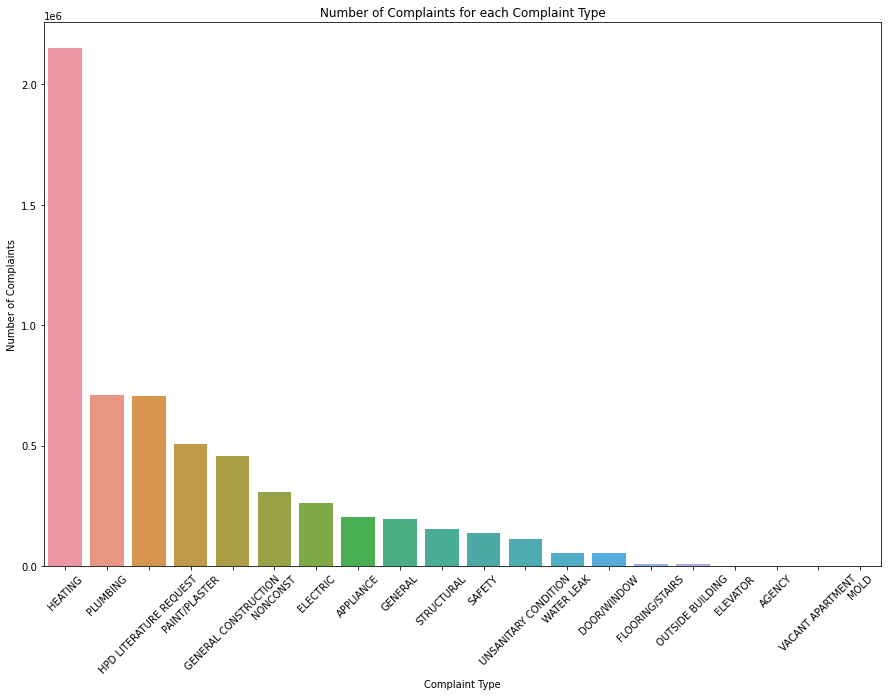

In [17]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=NY311_df["Complaint Type"].unique(), y=NY311_df["Complaint Type"].value_counts())
ax.set(xlabel="Complaint Type", ylabel="Number of Complaints")
ax.set_title("Number of Complaints for each Complaint Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [20]:
NY311_df["Complaint Type"].value_counts() >= 800000

HEATING                    True
PLUMBING                  False
PAINT/PLASTER             False
GENERAL CONSTRUCTION      False
UNSANITARY CONDITION      False
ELECTRIC                  False
NONCONST                  False
DOOR/WINDOW               False
WATER LEAK                False
GENERAL                   False
FLOORING/STAIRS           False
APPLIANCE                 False
HPD LITERATURE REQUEST    False
SAFETY                    False
OUTSIDE BUILDING          False
ELEVATOR                  False
STRUCTURAL                False
AGENCY                    False
VACANT APARTMENT          False
MOLD                      False
Name: Complaint Type, dtype: bool

There was only one complaint type that met the threshold which was **HEATING** complaints. From this, I decided that the Department of Housing Preservation and Development should focus on HEATING complaints and would be the focus of the rest of my analyses.